# Hacktiv8-PTP Python For Data Science // S.15 // Model Deployment

In [ ]:
#Data scientist sering kali harus menyampaikan hasil kepada orang lain. Dalam beberapa kasus, supervisor/atasan mungkin ingin melihat beberapa angka atau kita harus menuliskan main insights dari beberapa pekerjaan. Ini cukup mudah - kita hanya copy dan paste ke email atau dokumen Latex. Tetapi bagaimana jika kita ingin mengirim seseorang model sebenarnya yang telah kita latih, sehingga mereka dapat mengevaluasi atau menggunakannya? Jika orang yang dimaksud cukup teknis, maka kita bisa menyimpan model ke disk dan kirim via email, bersama dengan beberapa notebook Jupyter.

#Tetapi bagaimana jika kita ingin seseorang di bagian marketing mencoba sebuah model, atau kita ingin membagikannya dengan teman-teman yang mungkin menganggapnya menarik? Dalam kasus ini, kita harus membuat kode kita dapat diakses oleh mereka dengan cara yang mereka kenal.

#Tiga bagian dari sesi ini adalah:
# Creating a simple model that can be deployed to the web, where users can input variables to get predictions.
# Building the components needed by Flask microframework to create a web app.
# Deploying the final web app using the Heroku platform.

## Creating Model for Deployment

In [ ]:
#Kita dapat menerapkan dari model yang kita buat sebelumnya; atau jika kita menginginkan model baru, ikuti langkah di bawah ini. Ambil data yang digunakan dari sini.

#Dataset tersebut terdiri dari data penempatan siswa di kampus XYZ. Mencakup secondary dan higher secondary school percentage dan specialization. Ini juga mencakup degree specialization, type dan Work experience dan tawaran salary kepada siswa yang ditempatkan.

### Importing Libraries

In [1]:
#Notes: Profiling boleh diinstall atau tidak diinstall. Dalam sesi ini, profiling hanya digunakan menjadi contoh untuk memudahkan analisa.

#Lewati cell report = data.profile_report(title='Campus Placement Data - Report', progress_bar=False) Jika memutuskan untuk tidak menggunakan profiling.

#!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=f6109863cfdd72de6b7a983978e5f57e482797226894f4754fed99d0ff882475
  Stored in directory: c:\users\w i n d o w s\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [4]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

### Examining Dataset

In [5]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
#Inference
# We have Gender and Educational qualification data
# We have all the educational performance(score) data
# We have the status of placement and salary details
# We can expect null values in salary as candidates who weren't placed would have no salary
# Status of placement is our target variable rest of them are independent variable except salary

print ("The shape of the  data is (row, column):"+ str(data.shape))
print (data.info())

The shape of the  data is (row, column):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [7]:
report = data.profile_report(title='Campus Placement Data - Report',
                             progress_bar=False)
report

# Uncomment syntax below to make new html file

# report.to_file(output_file='output.html')

In [8]:
# 67 Missing values in Salary for students who didn't get placed. NaN Value needs to be filled.
# Data is not scaled. Salary column ranges from 200k-940k, rest of numerical columns are percentages.
# 300k at 75th Percentile goes all the way up to 940k max, in Salary (high skewnwss). Thus, outliers at high salary end.

### Data Cleaning / Handling missing values

In [9]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',
      data['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


### Exploring Data by each Features (Optional)

In [10]:
"""
Feature: Gender

Does gender affect placements?
"""

data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


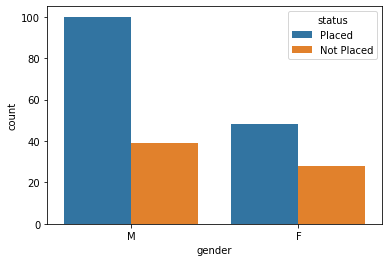

In [11]:
sns.countplot("gender", hue="status", data=data)
plt.show()

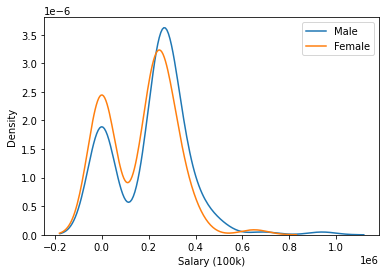

In [12]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


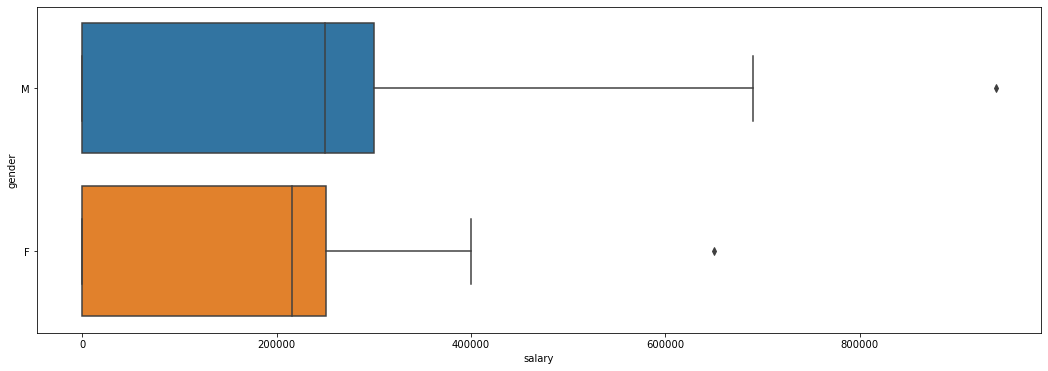

In [13]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

In [14]:
#Insights
# We have samples of 139 Male studets and 76 Female students.
# 30 Female and 40 Male students are not placed. Male students have comparatively higher placemets.
# Male students are offered slightly greater salary than female on an average.

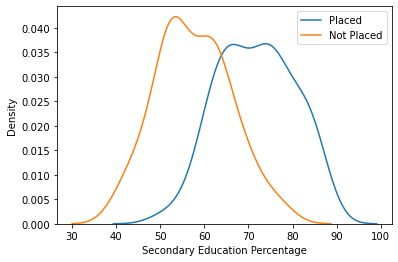

In [15]:
"""
Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)

Does Secondary Education affect placements?
"""
sns.kdeplot(data.ssc_p[data.status=="Placed"])
sns.kdeplot(data.ssc_p[data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

In [16]:
# All students with Secondary Education Percentage above 90% are placed
# All students with Secondary Education Percentage below 50% are not-placed
# Students with good Secondary Education Percentage are placed on average.

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


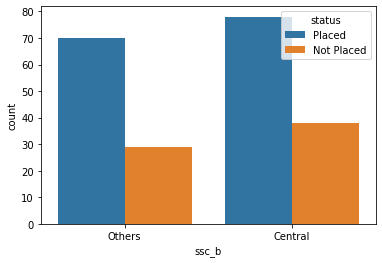

In [17]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


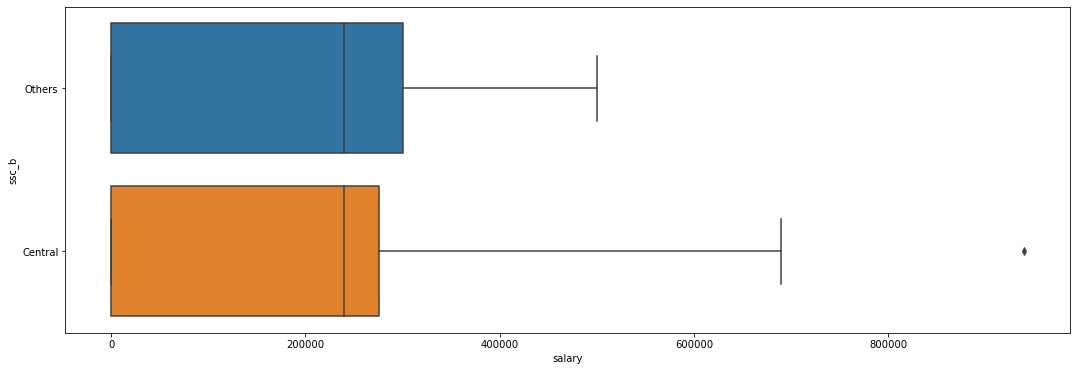

In [18]:
#Board Of Education tidak banyak mempengaruhi Placement Status.

plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


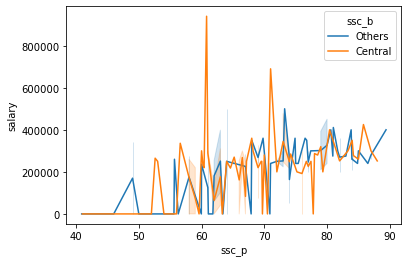

In [19]:
#Outliers terdapat pada keduanya, tetapi siswa dari Central Board mendapatkan pekerjaan bergaji tinggi.

sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

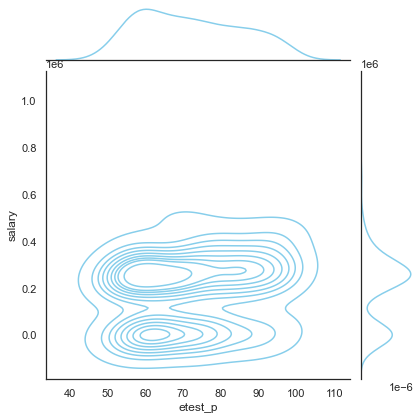

In [20]:
#Tidak ada pola khusus (correlation) antara Secondary Education Percentage dan Salary. Board of Education Tidak Mempengaruhi Gaji

#Kita dapat membuat grafik sendiri dari sini.

sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")

plt.show()

In [21]:
# Most of the candidates scored around 60 percentage got a decent package of around 3 lakhs PA
# Not many candidates received salary more than 4 lakhs PA
# The bottom dense part shows the candidates who were not placed

C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\W I N D O W S\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

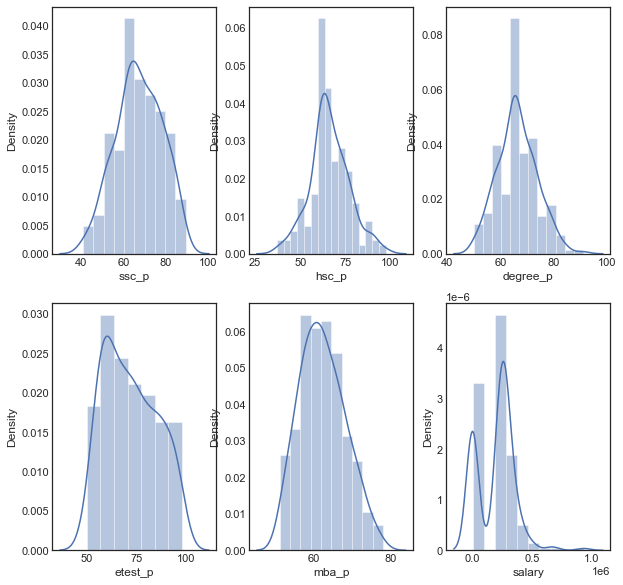

In [22]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

In [ ]:
# All the distributions follow normal distribution except salary feature
# Most of the candidates educational performances are between 60-80%
# Salary distribution got outliers where few have got salary of 7.5L and 10L PA

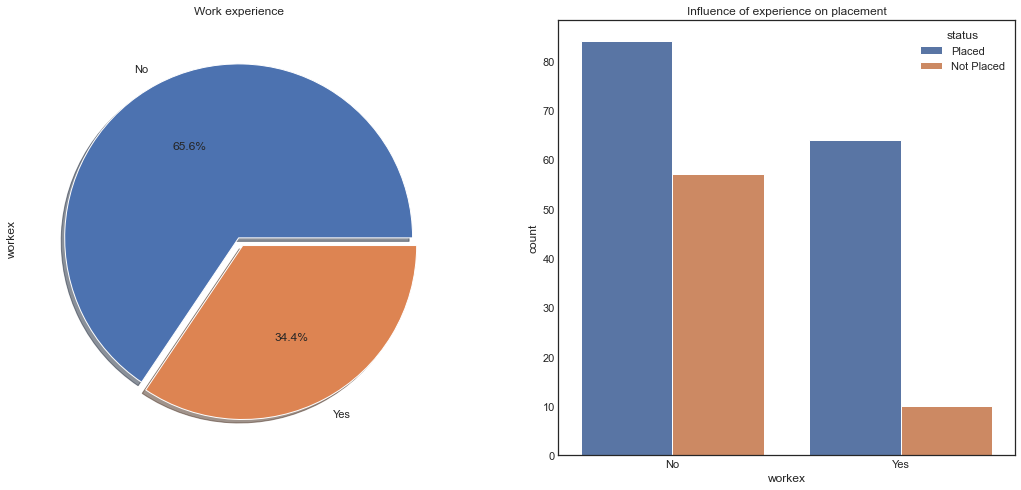

In [24]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = data)
ax[1].set_title('Influence of experience on placement')

plt.show()

In [ ]:
# We have nearly 66.2% of candidates who never had any work experience
# Candidates who never had work experience have got hired more than the ones who had experience
# We can conclude that work experience doesn't influence a candidate in the recruitment process

### Preprocessing data for classfication models

In [26]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [27]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# Seperating Features and Target
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [29]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [30]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8153846153846154
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.85      0.89      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.77      0.78        65
weighted avg       0.81      0.82      0.81        65



In [31]:
#Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8615384615384616
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.89      0.91      0.90        45

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



In [32]:
#Using Logistic Regression

LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



### Getting ready for deployment

#### Pickle
Modul pickle Python digunakan untuk serializing dan de-serializing struktur objek Python. Objek apa pun dengan Python dapat dibuat pickled sehingga dapat disimpan di disk. Apa yang dilakukan pickle adalah 'serializes' objek terlebih dahulu sebelum menulisnya ke file. Pickling adalah cara untuk mengubah objek python (list, dict, etc.) Menjadi character stream. Idenya adalah bahwa character stream ini berisi semua informasi yang diperlukan untuk merekonstruksi objek dalam skrip python lain.

In [33]:
pickle.dump(random_forest, open('model_classifier.pkl','wb'))